# Cats vs Dogs (Kaggle)
https://www.kaggle.com/c/dogs-vs-cats/

# Pre-processing

## Image Grid

In [4]:
from matplotlib import pyplot as plt

def showSingleImage(img, title, size):
    fig, axis = plt.subplots(figsize = size)

    axis.imshow(img, 'gray')
    axis.set_title(title, fontdict = {'fontsize': 20, 'fontweight': 'medium'})
    plt.show()
    
def showMultipleImages(imgsArray, titlesArray, size, x, y):
    if(x < 1 or y < 1):
        print("ERROR: X and Y cannot be zero or below zero!")
        return
    elif(x == 1 and y == 1):
        showSingleImage(imgsArray, titlesArray)
    elif(x == 1):
        fig, axis = plt.subplots(y, figsize = size)
        yId = 0
        for img in imgsArray:
            axis[yId].imshow(img, 'gray')
            axis[yId].set_anchor('NW')
            axis[yId].set_title(titlesArray[yId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)

            yId += 1
    elif(y == 1):
        fig, axis = plt.subplots(1, x, figsize = size)
        fig.suptitle(titlesArray)
        xId = 0
        for img in imgsArray:
            axis[xId].imshow(img, 'gray')
            axis[xId].set_anchor('NW')
            axis[xId].set_title(titlesArray[xId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)

            xId += 1
    else:
        fig, axis = plt.subplots(y, x, figsize = size)
        xId, yId, titleId = 0, 0, 0
        for img in imgsArray:
            axis[yId, xId].set_title(titlesArray[titleId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)
            axis[yId, xId].set_anchor('NW')
            axis[yId, xId].imshow(img, 'gray')
            if(len(titlesArray[titleId]) == 0):
                axis[yId, xId].axis('off')

            titleId += 1
            xId += 1
            if xId == x:
                xId = 0
                yId += 1
    plt.show()

## Load images from directory

In [5]:
import os
current_dir = os.path.abspath(os.getcwd())

In [6]:
import glob

original_path = current_dir + "\\train\\"
dog_img_files = glob.glob(original_path + 'dog.*')
original_path

'e:\\Atriam-Dev\\DataScience\\DataSciencePython\\11_ML_UD\\08_Convolutional_Neural_Networks/train/'

## Display 9 random dog pictures

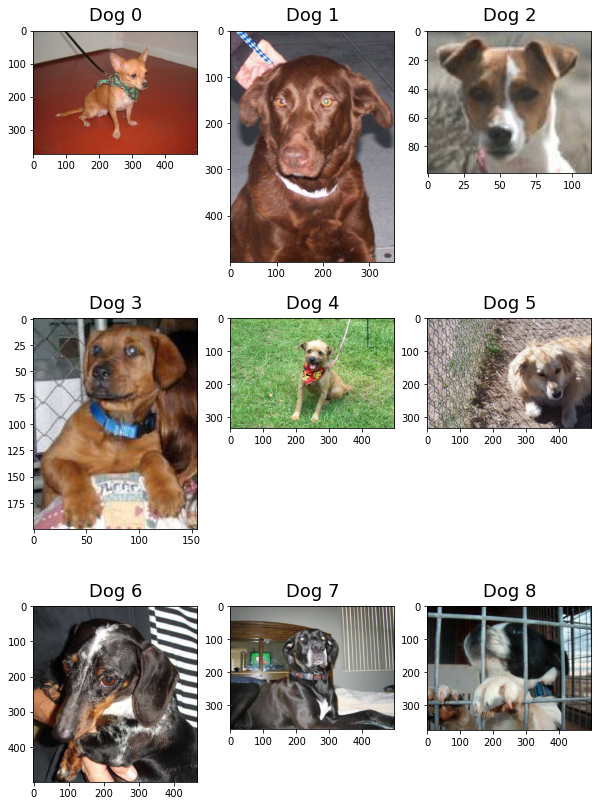

In [8]:
import random
import cv2

random_dog_imgs = [cv2.imread(img_file) for img_file in random.sample(dog_img_files, 9)]
random_dog_imgs = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in random_dog_imgs]
titles = ['Dog ' + str(i) for i in range(9)]
showMultipleImages(random_dog_imgs, titles, (10, 15), 3, 3)

## Converter base de dados para treino, validação e teste

In [9]:
#creates a new folder for dogs and cats following the Keras/Tensorflow structure
folder = "\\cats_and_dogs_dataset"
train_folder = current_dir + folder + "\\train"
val_folder = current_dir + folder + "\\validation"
test_folder = current_dir + folder + "\\test"

In [10]:
import os

os.mkdir(current_dir + folder) #create new folder to dataset
os.mkdir(train_folder) #create new folder to train
os.mkdir(val_folder) #create new folder to validation
os.mkdir(test_folder) #create new folder to test

new_folder_train_dogs = train_folder + "\\dogs"
new_folder_train_cats = train_folder + "\\cats"
new_folder_val_dogs = val_folder + "\\dogs"
new_folder_val_cats = val_folder + "\\cats"
new_folder_test_dogs = test_folder + "\\dogs"
new_folder_test_cats = test_folder + "\\cats"

os.mkdir(new_folder_train_dogs)
os.mkdir(new_folder_train_cats)
os.mkdir(new_folder_val_dogs)
os.mkdir(new_folder_val_cats)
os.mkdir(new_folder_test_dogs)
os.mkdir(new_folder_test_cats)

In [11]:
import shutil

percent_val = 0.10
percent_test = 0.20

def moveImagesToCorrectFolder():
    #list of files where they are currently located
    dog_train_files = glob.glob(original_path + 'dog.*')
    cat_train_files = glob.glob(original_path + 'cat.*')

    #for each dog image, move to the correct folder
    for f in dog_train_files:
        rand_val = random.random()
        filename = f.split("/")[-1] #from an address like C:/model/img1.jpg, get only the img1.jpg
        if rand_val <= percent_val: #10% of the images go to val
            shutil.move(f, new_folder_val_dogs + "\\" + filename) #move from origin to val of dog
        elif rand_val > percent_val and rand_val <= percent_val + percent_test:
            shutil.move(f, new_folder_test_dogs + "\\" + filename) #move from origin to test of dog
        else:
            shutil.move(f, new_folder_train_dogs + "\\" + filename) #move from origin to train of dog

    #for each cat image move to correct folder
    for f in cat_train_files:
        rand_val = random.random()
        filename = f.split("/")[-1] #from an address like C:/model/img1.jpg, get only the img1.jpg
        if rand_val <= percent_val: #10% of the images go to val
            shutil.move(f, new_folder_val_cats + "\\" + filename) #move from origin to val of cat
        elif rand_val > percent_val and rand_val <= percent_val + percent_test:
            shutil.move(f, new_folder_test_cats + "\\" + filename) #move from origin to test of cat
        else:
            shutil.move(f, new_folder_train_cats + "\\" + filename) #move from origin to train of cat
        
moveImagesToCorrectFolder()
os.rmdir(original_path)

FileNotFoundError: [Errno 2] No such file or directory: 'e:\\Atriam-Dev\\DataScience\\DataSciencePython\\11_ML_UD\\08_Convolutional_Neural_Networks/cats_and_dogs_dataset/validation/dogs/train\\dog.0.jpg'

# References

* https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/
* https://stackoverflow.com/questions/3430372/how-do-i-get-the-full-path-of-the-current-files-directory
* https://www.geeksforgeeks.org/python-list-files-in-a-directory/
* https://pynative.com/python-random-sample/
* https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/
* https://www.mygreatlearning.com/blog/keras-tutorial/
* https://www.machinecurve.com/index.php/2020/03/30/how-to-use-conv2d-with-keras/
* https://newbedev.com/keras-model-predict-for-a-single-image
* https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/